In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

In [2]:
boston_dataset = load_boston()

In [3]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
#The prices of the house indicated by the variable MEDV is our target variable
#We can see that the target value MEDV is missing from the data.
boston['MEDV'] = boston_dataset.target
#We add our target variable to dataframe

In [7]:
boston.head()
#as you can see our df is ready to explore

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Preprocesssing

In [8]:
boston.isnull().sum()
#we have no missing values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

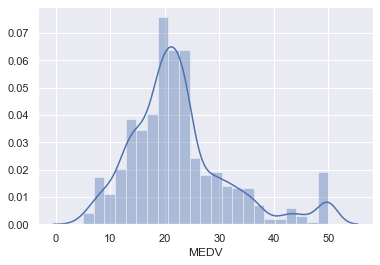

In [9]:
import seaborn as sns
sns.set()
sns.distplot(boston['MEDV'])
plt.show()
#We see that the values of MEDV are distributed normally with a few outliers.

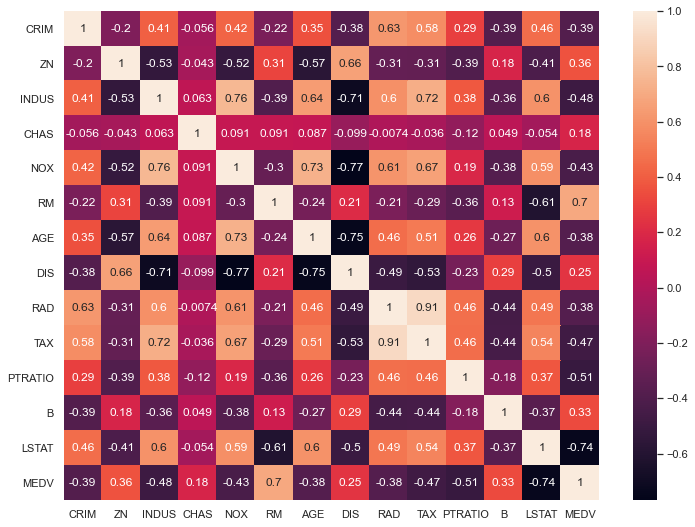

In [10]:
plt.subplots(figsize=(12,9))
sns.heatmap(data=boston.corr(), annot = True)

To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV.
By looking at the correlation matrix we can see that 
RM has a strong positive correlation with MEDV (0.7) and
LSTAT has a high negative correlation with MEDV(-0.74). 

The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other.
We should not select both these features together for training the model.
Same goes for the features DIS and AGE which have a correlation of -0.75.

In [11]:
X = boston.drop('MEDV', axis=1)
y = boston["MEDV"]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression
modelb = LinearRegression(normalize=False)
modelb.fit(X_train,y_train)

print("Score of the train set",modelb.score(X_train,y_train))
print("Score of the test set",modelb.score(X_test,y_test))

Score of the train set 0.7434997532004697
Score of the test set 0.7112260057484903


In [42]:
def adj_r2 (X,y,model):
    r_squared = modelb.score(X,y)
    return(1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1))

print("Adj. R2 of the train set",adj_r2(X_train,y_train,modelb))
print("Adj. R2 of the test set",adj_r2(X_test,y_test,modelb))

Adj. R2 of the train set 0.7336923908228405
Adj. R2 of the test set 0.6840226584639277


In [15]:
#or we can create a model with statsmodel
import statsmodels.api as sm
lm = sm.OLS(y,X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Fri, 08 Jan 2021   Prob (F-statistic):                        0.00
Time:                        20:50:00   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0929      0.034     -2.699      0.007      -0.161      -0.025
ZN             0.0487      0.014      3.382      0.001       0.020       0.077
INDUS         -0.0041      0.064     -0.063      0.950      -0.131       0.123
CHAS           2.8540      0.904      3.157      0.002       1.078       4.630
NOX           -2.8684      3.359     -0.854      0.394      -9.468       3.731
RM             5.9281      0.309     19.178      0.000       5.321       6.535
AGE           -0.0073      0.014     -0.526      0.599      -0.034       0.020
DIS           -0.9685      0.196     -4.951      0.000      -1.353      -0.584
RAD            0.1712      0.067      2.564      0.011       0.040       0.302
TAX           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
PTRATIO       -0.3922      0.110     -3.570      0.000      -0.608      -0.176
B              0.0149      0.003      5.528      0.000       0.010       0.020
LSTAT         -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Ridge model

In [29]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error

In [30]:
ridge_model = Ridge().fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
RMSE_ridge = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:",RMSE_ridge)

RMSE: 4.695109486461524


In [25]:
alphas = np.linspace(10,-2,100)
ridgecv = RidgeCV(alphas=alphas, scoring="neg_mean_squared_error", cv = 10, normalize=True)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([10.        ,  9.87878788,  9.75757576,  9.63636364,  9.51515152,
        9.39393939,  9.27272727,  9.15151515,  9.03030303,  8.90909091,
        8.78787879,  8.66666667,  8.54545455,  8.42424242,  8.3030303 ,
        8.18181818,  8.06060606,  7.93939394,  7.81818182,  7.6969697 ,
        7.57575758,  7.45454545,  7.33333333,  7.21212121,  7.09090909,
        6.96969697,  6.84848485,  6.72727273,  6.60606061,  6.48484848,
        6.36363...
        1.51515152,  1.39393939,  1.27272727,  1.15151515,  1.03030303,
        0.90909091,  0.78787879,  0.66666667,  0.54545455,  0.42424242,
        0.3030303 ,  0.18181818,  0.06060606, -0.06060606, -0.18181818,
       -0.3030303 , -0.42424242, -0.54545455, -0.66666667, -0.78787879,
       -0.90909091, -1.03030303, -1.15151515, -1.27272727, -1.39393939,
       -1.51515152, -1.63636364, -1.75757576, -1.87878788, -2.        ]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [27]:
ridgecv.alpha_
#optimum alpha value for the ridge model

0.06060606060606055

In [44]:
ridge_tuned = Ridge(alpha = ridgecv.alpha_).fit(X_train, y_train)
y_pred = ridge_tuned.predict(X_test) 
RMSE_ridge_tuned = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE_ridge_tuned:",RMSE_ridge_tuned)

RMSE_ridge_tuned: 4.64311657754447


### Lasso model

In [33]:
lasso_model = Lasso().fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
RMSE_lasso = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:",RMSE_lasso)

RMSE: 5.06354647732634


In [37]:
alphas_2 = 10**np.linspace(20,-5,20)*0.5
lasso_cv_model = LassoCV(alphas = alphas_2, cv = 10, max_iter = 100000).fit(X_train, y_train)
lasso_cv_model.fit(X_train, y_train)

LassoCV(alphas=array([5.00000000e+19, 2.41646512e+18, 1.16786073e+17, 5.64418946e+15,
       2.72779739e+14, 1.31832545e+13, 6.37137493e+11, 3.07924106e+10,
       1.48817572e+09, 7.19224944e+07, 3.47596398e+06, 1.67990914e+05,
       8.11888370e+03, 3.92379985e+02, 1.89634510e+01, 9.16490355e-01,
       4.42933395e-02, 2.14066620e-03, 1.03456904e-04, 5.00000000e-06]),
        cv=10, max_iter=100000)

In [38]:
lasso_cv_model.alpha_
#optimum alpha value for the lasso model

5e-06

In [46]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_).fit(X_train, y_train)
y_pred = lasso_tuned.predict(X_test) 
RMSE_lasso_tuned = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE_lasso_tuned:",RMSE_lasso_tuned)

RMSE_lasso_tuned: 4.638697179746937


### Comparison

In [45]:
#Model score - r^2 or coeff of determinant
#r^2 = 1-(RSS/TSS) = Regression error/TSS 

#Simple Linear Model
print("Simple Train: ", modelb.score(X_train, y_train))
print("Simple Test: ", modelb.score(X_test, y_test))
print('*************************')
#Lasso
print("Lasso Train: ", lasso_tuned.score(X_train, y_train))
print("Lasso Test: ", lasso_tuned.score(X_test, y_test))
print('*************************')
#Ridge
print("Ridge Train: ", ridge_tuned.score(X_train, y_train))
print("Ridge Test: ", ridge_tuned.score(X_test, y_test))

Simple Train:  0.7434997532004697
Simple Test:  0.7112260057484903
*************************
Lasso Train:  0.7434997530921303
Lasso Test:  0.7112251026291896
*************************
Ridge Train:  0.7434755086985373
Ridge Test:  0.7106745950041411
